In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Collecting the data

In [366]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

df.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
787,10.0,0.560,0.24,2.20,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,6
205,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
1523,6.8,0.480,0.25,2.00,0.076,29.0,61.0,0.99530,3.34,0.60,10.4,5
614,9.2,0.755,0.18,2.20,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
1377,5.2,0.490,0.26,2.30,0.090,23.0,74.0,0.99530,3.71,0.62,12.2,6
673,8.2,0.730,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5
1156,8.5,0.180,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7
1487,6.0,0.640,0.05,1.90,0.066,9.0,17.0,0.99496,3.52,0.78,10.6,5
1101,7.4,0.490,0.27,2.10,0.071,14.0,25.0,0.99388,3.35,0.63,12.0,6
1548,11.2,0.400,0.50,2.00,0.099,19.0,50.0,0.99783,3.10,0.58,10.4,5


# Pre-Processing

### Checking the shape of data and checking the null Values

In [367]:
df.shape

(1599, 12)

In [368]:
df.isna().sum()
# no null values found

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Explorative descriptive analysis

In [369]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


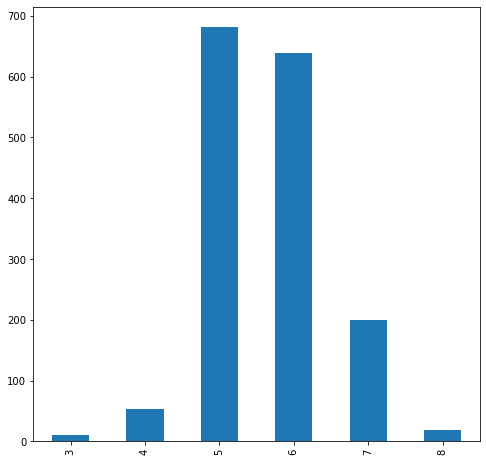

In [370]:
#checking th frequency of output variable

df['quality'].value_counts().sort_index().plot(kind='bar',figsize=(8,8))
plt.show()

### Categorizing the output label

In [371]:
# categorizing good and bad wine quality ( 7 or higher is good, remaining bad)
df['quality'] = [1 if i>=7 else 0 for i in df['quality']]
df.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1320,9.7,0.660,0.34,2.60,0.094,12.0,88.0,0.99796,3.26,0.66,10.1,0
1594,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
118,8.8,0.550,0.04,2.20,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,0
1116,7.0,0.690,0.07,2.50,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,0
1348,7.2,0.655,0.03,1.80,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,0
619,11.3,0.370,0.41,2.30,0.088,6.0,16.0,0.99880,3.09,0.80,9.3,0
1151,6.1,0.580,0.23,2.50,0.044,16.0,70.0,0.99352,3.46,0.65,12.5,0
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,0
1303,8.0,0.280,0.44,1.80,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,0
731,8.9,0.875,0.13,3.45,0.088,4.0,14.0,0.99940,3.44,0.52,11.5,0


### Checking the frequency of output label

0    1382
1     217
Name: quality, dtype: int64

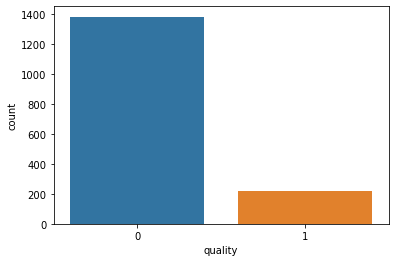

In [372]:
#checking the frequeny of output label 0 and 1
sns.countplot(x='quality',data=df)
df['quality'].value_counts()

### Treating the unbalanced dataset

In [373]:
# data is unbalanced, we will use resampling technique to balance the dataset
from sklearn.utils import resample
## 
df_good = df[df.quality==1]
df_bad = df[df.quality==0]

df_good = resample(df_good,replace=True,n_samples=1300,random_state=25)

df_new = pd.concat([df_good,df_bad])

<AxesSubplot:xlabel='quality', ylabel='count'>

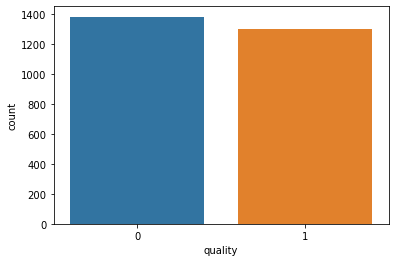

In [374]:
#vizualizing the data after upsampling
sns.countplot(x='quality',data=df_new)

### Checking the Multicolinearity 

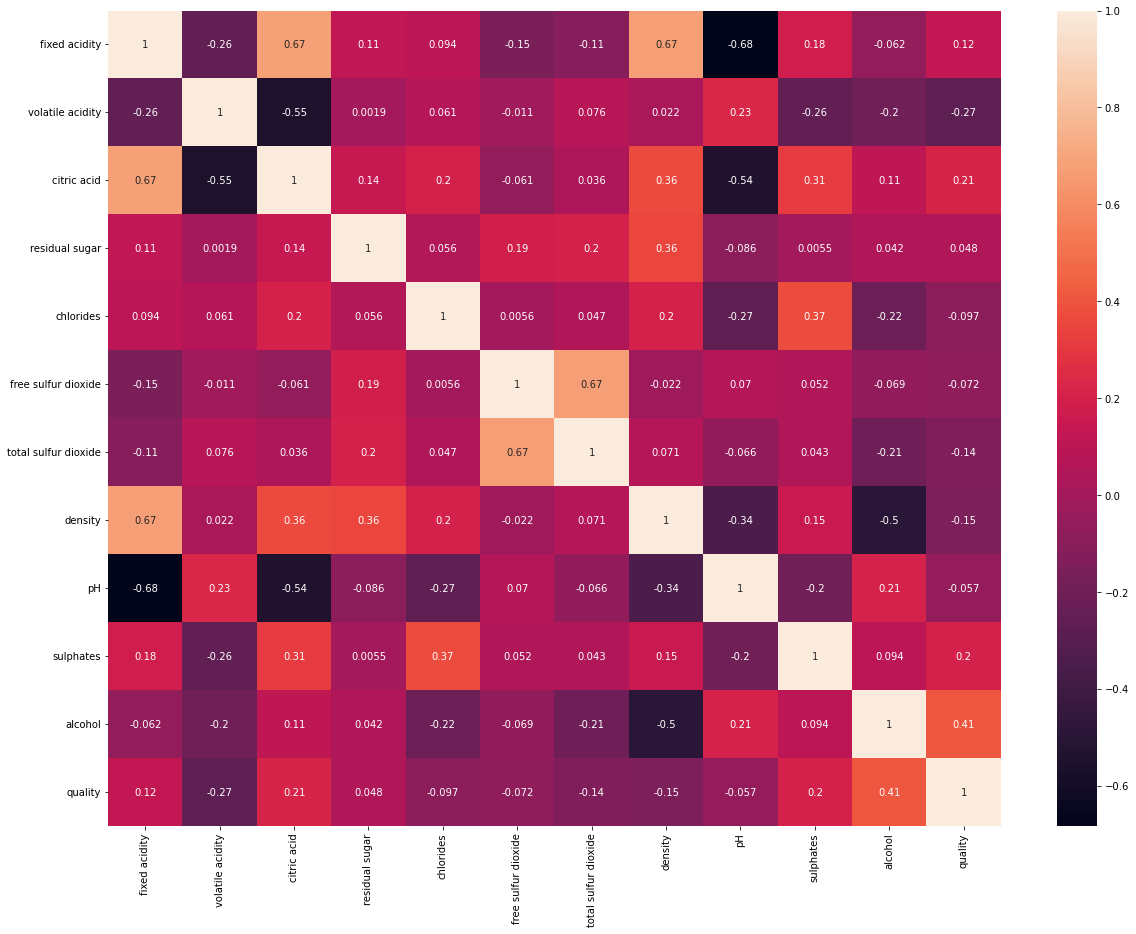

In [375]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Spliting the Data

In [376]:
# dividng the data into features and label
X = df_new.drop(columns='quality')
y = df_new['quality']

X.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
1459,7.9,0.20,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9
444,5.3,0.57,0.01,1.7,0.054,5.0,27.0,0.99340,3.57,0.84,12.5
375,11.5,0.54,0.71,4.4,0.124,6.0,15.0,0.99840,3.01,0.83,11.8
1264,8.5,0.37,0.32,1.8,0.066,26.0,51.0,0.99456,3.38,0.72,11.8
470,13.0,0.32,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6
898,8.3,0.31,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5
368,10.3,0.34,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.4
281,7.7,0.27,0.68,3.5,0.358,5.0,10.0,0.99720,3.25,1.08,9.9


### Feature Selection

In [377]:
# we will select best features using chi square technique

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

# selecting best 80 percent features
s_percentile = SelectPercentile(score_func=chi2, percentile=80)
s_percentile = s_percentile.fit(X,y)

col = s_percentile.get_support(indices=True)
features = X.columns[col]

In [378]:
print(features)
print(col)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')
[ 0  1  2  3  5  6  9 10]


In [379]:
X = df_new[features]

### Checking the distribution of feature data

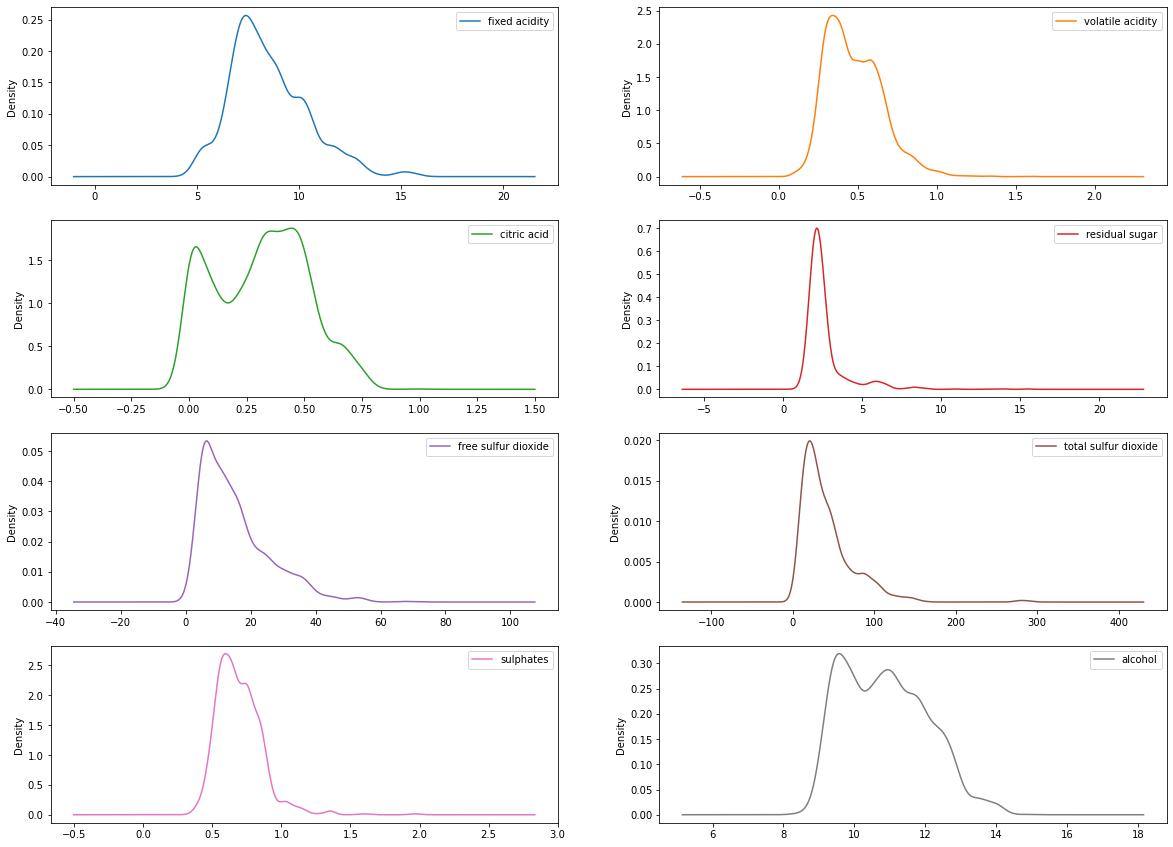

citric acid             0.047966
alcohol                 0.386378
fixed acidity           0.804816
volatile acidity        0.815426
free sulfur dioxide     1.306232
sulphates               1.640130
total sulfur dioxide    2.503761
residual sugar          3.735280
dtype: float64

In [380]:
# checking the distribution of features 

X.plot(kind='density',subplots=True,sharex=False,layout=(4,2),figsize=(20,15))
plt.show()

X.skew().sort_values(ascending=True)

We can see the skewness in 6 out 7 out of 9 columns so we will go ahead and remove the skewness

### Removing the skewness

In [381]:
# removing the skenweness of the data using power_transform
from sklearn.preprocessing import power_transform

x = power_transform(X)

x = pd.DataFrame(x,columns=X.columns)

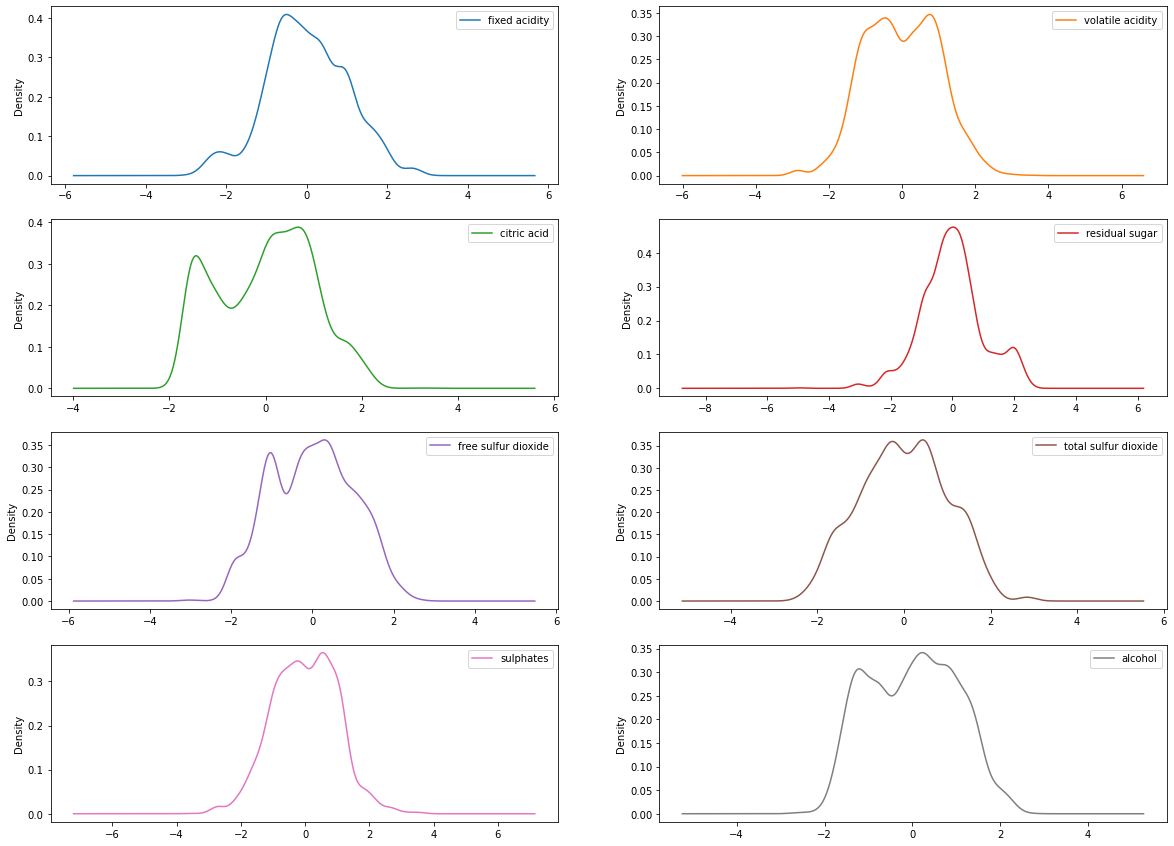

In [382]:
# vizualizing it usig ddensity plot
x.plot(kind='density',subplots=True,sharex=False,layout=(4,2),figsize=(20,15))
plt.show()

In [383]:
# checking the skewness
x.skew().sort_values(ascending=True)

citric acid            -0.033688
sulphates              -0.009176
fixed acidity           0.001710
free sulfur dioxide     0.002802
total sulfur dioxide    0.012193
residual sugar          0.017135
volatile acidity        0.025886
alcohol                 0.034983
dtype: float64

it looks like we got range from -0.4 to +0.4 (Skewness removed)

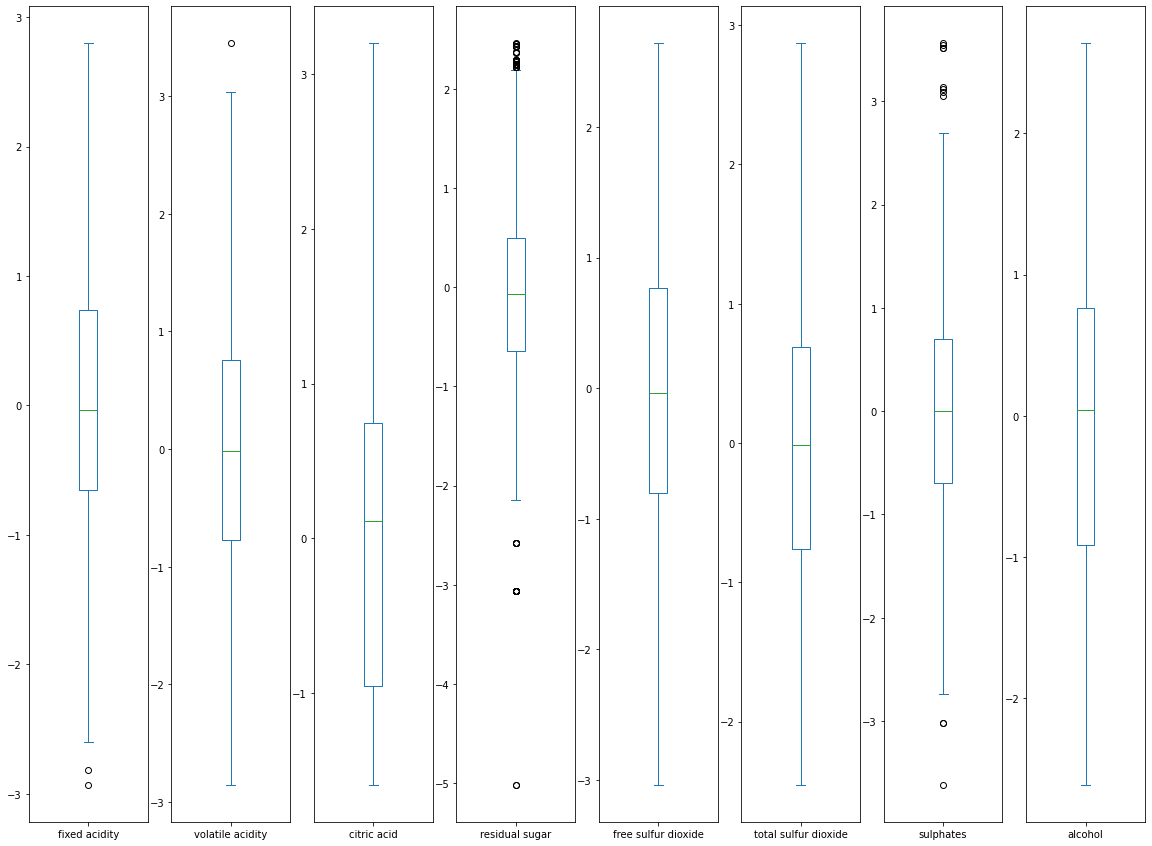

In [384]:
#checking the outlier using zscore and boxplot
zscore(x).plot(kind='box',figsize=(20,15),sharex=False,subplots=True)
plt.show()

### Scaling the Data

In [385]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)


# Training the data

In [386]:
#importing relevanat libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
# finding the best random state for logistics regression
rs = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,random_state=i,test_size=.20)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    mae = accuracy_score(y_test,y_pred)
    
    if mae > acc:
        acc = mae
        rs = i
        print('best random state = ',rs,'accurancy score =',mae)

best random state =  0 accurancy score = 0.8044692737430168
best random state =  4 accurancy score = 0.8268156424581006
best random state =  43 accurancy score = 0.8305400372439479
best random state =  59 accurancy score = 0.8342644320297952


In [428]:
#importing relevanat libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,roc_curve,auc
# finding the best random state for decision tree
rs = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,random_state=i,test_size=.20)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    mae = accuracy_score(y_test,y_pred)
    
    if mae > acc:
        acc = mae
        rs = i
        print('best random state = ',rs,'accurancy score =',mae)

best random state =  0 accurancy score = 0.9459962756052142
best random state =  1 accurancy score = 0.9683426443202979
best random state =  3 accurancy score = 0.9720670391061452
best random state =  22 accurancy score = 0.9757914338919925
best random state =  59 accurancy score = 0.9776536312849162
best random state =  93 accurancy score = 0.9813780260707635


In [388]:
from sklearn.ensemble import RandomForestClassifier
# finding the best random state for random forest
rs = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,random_state=i,test_size=.20)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    mae = accuracy_score(y_test,y_pred)
    
    if mae > acc:
        acc = mae
        rs = i
        print('best random state = ',rs,'accurancy score =',mae)

best random state =  0 accurancy score = 0.9776536312849162
best random state =  9 accurancy score = 0.9795158286778398
best random state =  14 accurancy score = 0.9832402234636871
best random state =  22 accurancy score = 0.9851024208566108
best random state =  59 accurancy score = 0.9888268156424581


### Selecting the best training model

In [415]:
# we got best result from random forest classifier we will use that result
x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,random_state=59,test_size=.20)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# we will check the accuracy or training data
y_pred = rf.predict(x_train)
print('Accuracy Score ---',accuracy_score(y_train,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

Accuracy Score --- 100.0 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1098
           1       1.00      1.00      1.00      1047

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145

[[1098    0]
 [   0 1047]]


In [416]:
# we will check the accuracy or test data
y_pred = rf.predict(x_test)
print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print('\n-------- Confusion matrix--------\n',confusion_matrix(y_test,y_pred))

Accuracy Score --- 98.88268156424581 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       284
           1       0.98      1.00      0.99       253

    accuracy                           0.99       537
   macro avg       0.99      0.99      0.99       537
weighted avg       0.99      0.99      0.99       537


-------- Confusion matrix--------
 [[278   6]
 [  0 253]]


In [394]:
# as our model already have 98.51 % accuracy we wont be doing hyperparameter tuning

In [423]:
from sklearn.model_selection import cross_val_score
cross_valdation = cross_val_score(rf,x_scaled,y,cv=10).mean()
print('Accuracy Score ---\n',accuracy_score(y_test,y_pred)*100,'%','\ncross validation Score ---\n',cross_valdation*100,'%',)

Accuracy Score ---
 98.88268156424581 % 
cross validation Score ---
 96.56771902568939 %


#### AUC ROC Curve 

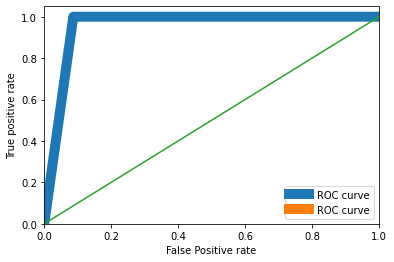

In [449]:
fpr,tpr,th = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,roc_auc,lw=10,label='ROC curve' % roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')